# kNN implementation in  python 


We first import two useful libraries
1. numpy (matrix algebra):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. use tab and shift+tab for help

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# this line plots graphs in line
%matplotlib inline

### First we generate a dataset

In [3]:
# randomly
# C_g is the array for centroids
# 
M_g = 3
np.random.seed(3)
C_g = np.random.rand(M_g,2)*.6+0.2
print C_g

[[ 0.53047874  0.62488869]
 [ 0.37454284  0.50649656]
 [ 0.73576817  0.73777585]]


In [4]:
# we can also fix the centroids on a diagonal
C_g=np.array([[.25,.25],
             [.5,.5],
             [.75,.75]])

In [5]:
# we can also choose the centroids arbitarily
C_g=np.array([[.25,.25],
             [.75,.5],
             [.45,.75]])

In [25]:
# Generate data set ( M=3, centroid, constant sigma)
#
sigma=0.2
number=50
#
# storing the centroid index 
X11=np.concatenate((sigma*np.random.randn(number,2)+C_g[0],np.full((number,1),0.0)),axis=1)
X22=np.concatenate((sigma*np.random.randn(number,2)+C_g[1],np.full((number,1),1.0)),axis=1)
X33=np.concatenate((sigma*np.random.randn(number,2)+C_g[2],np.full((number,1),2.0)),axis=1)
#
#X=np.concatenate((X1,X2,X3), axis=0)
X=np.concatenate((X11,X22,X33), axis=0)
np.random.shuffle(X)
#print X

#### You can improve the above code snippet to generate any arbitrary number (M) of  clusters

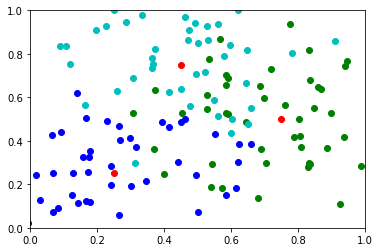

In [26]:
# plot data set and centroids
plt.figure()
col={0:'bo',1:'go', 2:'co'}
for i in range(len(X[:,0])):
    plt.plot(X[i,0],X[i,1],col[int(X[i,2])])

plt.plot(C_g[:,0],C_g[:,1],'ro')
plt.axis([0, 1.0, 0, 1.0])
plt.show()

In [27]:
#split data set into train and test
split = int((number*M_g)*0.7)
print "Split point = ",split
X_train=np.asarray(X[0:split,:])
print "Train size = ",len(X_train[:,0])
X_test=np.asarray(X[split:,:])
print "Test size =",len(X_test[:,0])

Split point =  105
Train size =  105
Test size = 45


## kNN starts here

In [1]:
# find distance from each example in x_train
# rank using distance
# pick up top k entries
# select by majority (use histogram)
x_new_index=0
#x_new_index=3
x_new=np.full((len(X_train),3),[X_test[x_new_index,0],X_test[x_new_index,1],-1.0])
#print x_new
x_diff=X_train-x_new
#print x_diff
x_new[:,2]=np.sqrt(x_diff[:,0]**2.0+x_diff[:,1]**2.0)
#print x_new
x_rank=np.concatenate((np.copy(X_train),x_new),axis=1)
#print x_rank
r_index=x_rank[:,5].argsort()
#print r_index
print X_test[x_new_index,:]
print x_rank[r_index,:][0:10,:]
#print x_rank[r_index,:][0:100,:]


NameError: name 'np' is not defined

In [29]:
# take majority from k nearest neighbours, if tie pick one at random
k=5
aa=x_rank[r_index,:][0:k,2]
print aa
hh,nn=np.histogram(aa,[0,1,2,3])
print hh
rr=hh.argsort()
print rr[-1], "is the predicted class"

[ 1.  2.  1.  2.  2.]
[0 2 3]
2 is the predicted class


In [32]:
# loop over all test cases
# calculate overall accuracy
# calculate accuracy per class
k=5
predicted = np.zeros(len(X_test[:,0]))
for x_new_index in range(len(X_test[:,0])):
    x_new=np.full((len(X_train),3),[X_test[x_new_index,0],X_test[x_new_index,1],-1.0])
    #print x_new
    x_diff=X_train-x_new
    #print x_diff
    x_new[:,2]=np.sqrt(x_diff[:,0]**2.0+x_diff[:,1]**2.0)
    #print x_new
    x_rank=np.concatenate((np.copy(X_train),x_new),axis=1)
    #print x_rank
    r_index=x_rank[:,5].argsort()
    #print x_new_index,
    aa=x_rank[r_index,:][0:k,2]
    print aa
    hh,nn=np.histogram(aa,[0,1,2,3])
    print hh
    rr=hh.argsort()
    print rr[-1], "is the predicted class"
    predicted[x_new_index]=rr[-1]


[ 1.  2.  1.  2.  2.]
[0 2 3]
2 is the predicted class
[ 0.  0.  1.  2.  1.]
[2 2 1]
1 is the predicted class
[ 2.  2.  1.  1.  2.]
[0 2 3]
2 is the predicted class
[ 2.  0.  0.  0.  0.]
[4 0 1]
0 is the predicted class
[ 2.  2.  2.  1.  2.]
[0 1 4]
2 is the predicted class
[ 1.  2.  1.  2.  1.]
[0 3 2]
1 is the predicted class
[ 2.  2.  2.  2.  2.]
[0 0 5]
2 is the predicted class
[ 2.  2.  2.  2.  2.]
[0 0 5]
2 is the predicted class
[ 2.  2.  2.  2.  0.]
[1 0 4]
2 is the predicted class
[ 1.  1.  2.  2.  1.]
[0 3 2]
1 is the predicted class
[ 1.  0.  0.  0.  0.]
[4 1 0]
0 is the predicted class
[ 2.  1.  1.  2.  0.]
[1 2 2]
2 is the predicted class
[ 2.  1.  1.  1.  2.]
[0 3 2]
1 is the predicted class
[ 0.  0.  0.  0.  0.]
[5 0 0]
0 is the predicted class
[ 2.  2.  2.  2.  2.]
[0 0 5]
2 is the predicted class
[ 0.  0.  0.  0.  0.]
[5 0 0]
0 is the predicted class
[ 2.  2.  2.  2.  2.]
[0 0 5]
2 is the predicted class
[ 0.  0.  0.  2.  1.]
[3 1 1]
0 is the predicted class
[ 1.  2.  

In [33]:
predicted

array([ 2.,  1.,  2.,  0.,  2.,  1.,  2.,  2.,  2.,  1.,  0.,  2.,  1.,
        0.,  2.,  0.,  2.,  0.,  2.,  1.,  2.,  1.,  1.,  1.,  2.,  0.,
        0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  1.,  1.,  2.,  1.,
        1.,  0.,  0.,  0.,  2.,  1.])

# Scratch Area


In [14]:
arr1 = np.array([0,0,4,1,0,0,1])
arr2 = np.array([1,0,1,1,0,1,1])
arr1

array([0, 0, 4, 1, 0, 0, 1])

In [15]:
np.sum(arr1==arr2)

4

In [16]:
arr1==arr2

array([False,  True, False,  True,  True, False,  True], dtype=bool)